In [260]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
os.getcwd()

'/home/tushar'

In [262]:
os.listdir(path)

['winequality.names', 'winequality-red.csv', 'winequality-white.csv']

In [263]:
red_df = pd.read_csv('/home/tushar/Interview/wine_quality/winequality-red.csv',sep=';')
white_df = pd.read_csv('/home/tushar/Interview/wine_quality/winequality-white.csv',sep=';')

In [264]:
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [265]:
#white_df
white_df[white_df.index.duplicated()]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


## Can we combine Red and White to predict the quality of the wine ?

### Answer : 
#### Quality Levels are different for both red wine and white wine. 
#### Furthermore we can clearly see that features that effect the red wine may or may not influence the white wine.
#### EDA and Analysis ahead 

### Output Variable is Quality

In [266]:
### Adding the feature Red and White after importing the dataset 
red_df['type']= 'red'
white_df['type']= 'white'
red_df.reset_index(inplace= True)
white_df.reset_index(inplace=True)

In [267]:
# Concatenating both the dataframes 
df = pd.concat([red_df,white_df],ignore_index=True)
df.reset_index(drop=True,inplace=True)
df.drop('index',inplace=True,axis=1)
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [268]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [269]:
### Number of unique values in the output variable 
## Clearly we can see that there are 7 unique values in the quality variable of the dataset 
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

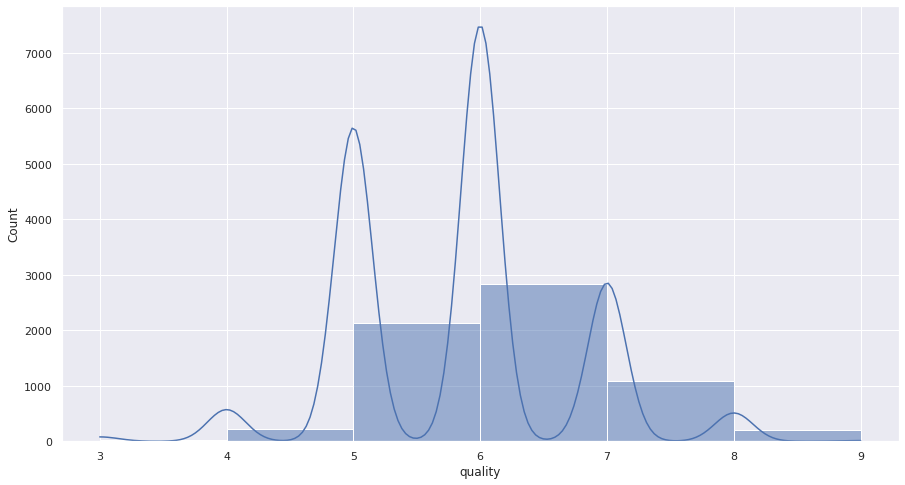

In [270]:
# We can set the bin width to 1 as there are 7 distinct values in the quality variable 
sns.histplot(df['quality'],binwidth=1 , kde = True)

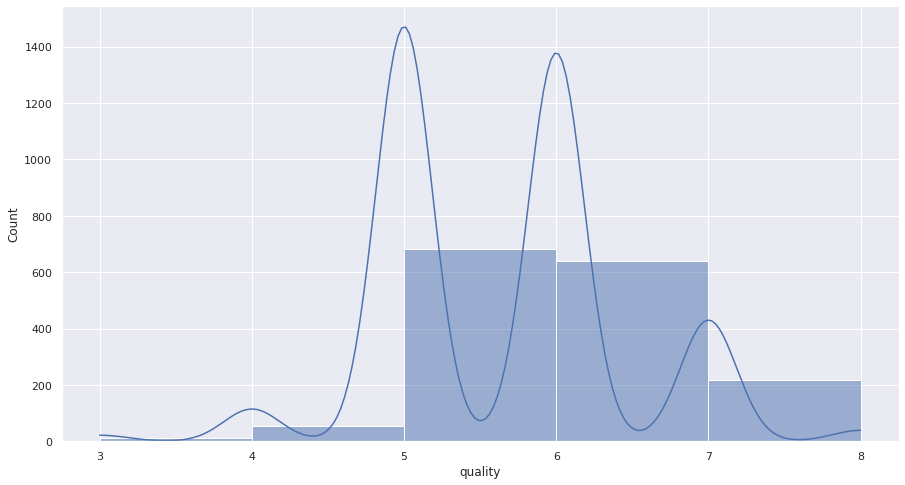

In [271]:
sns.histplot(red_df['quality'],binwidth=1 , kde = True)

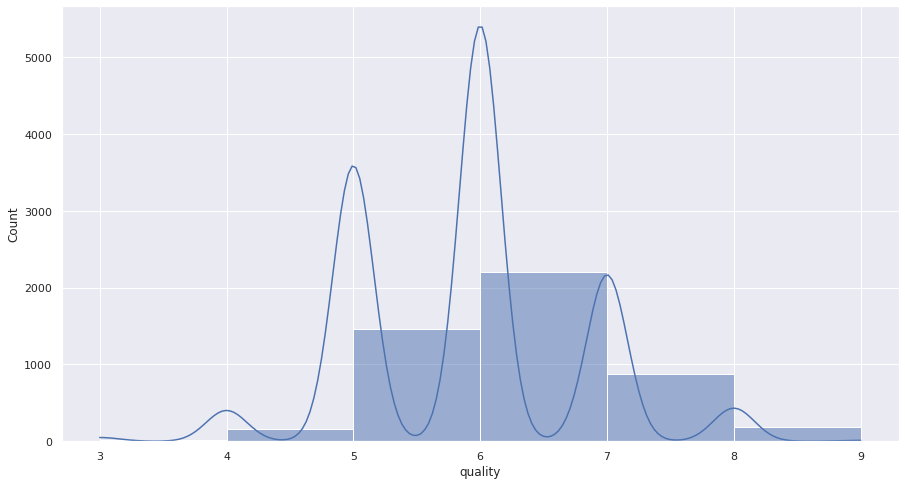

In [272]:
sns.histplot(white_df['quality'],binwidth=1 , kde = True)

In [273]:
#### We can clearly see from the above graph that the output variable i.e quality is dicreate varaible.
#### White Wine has quality levels from 3-7 whereas the Red Wine has quality levels from 3-9

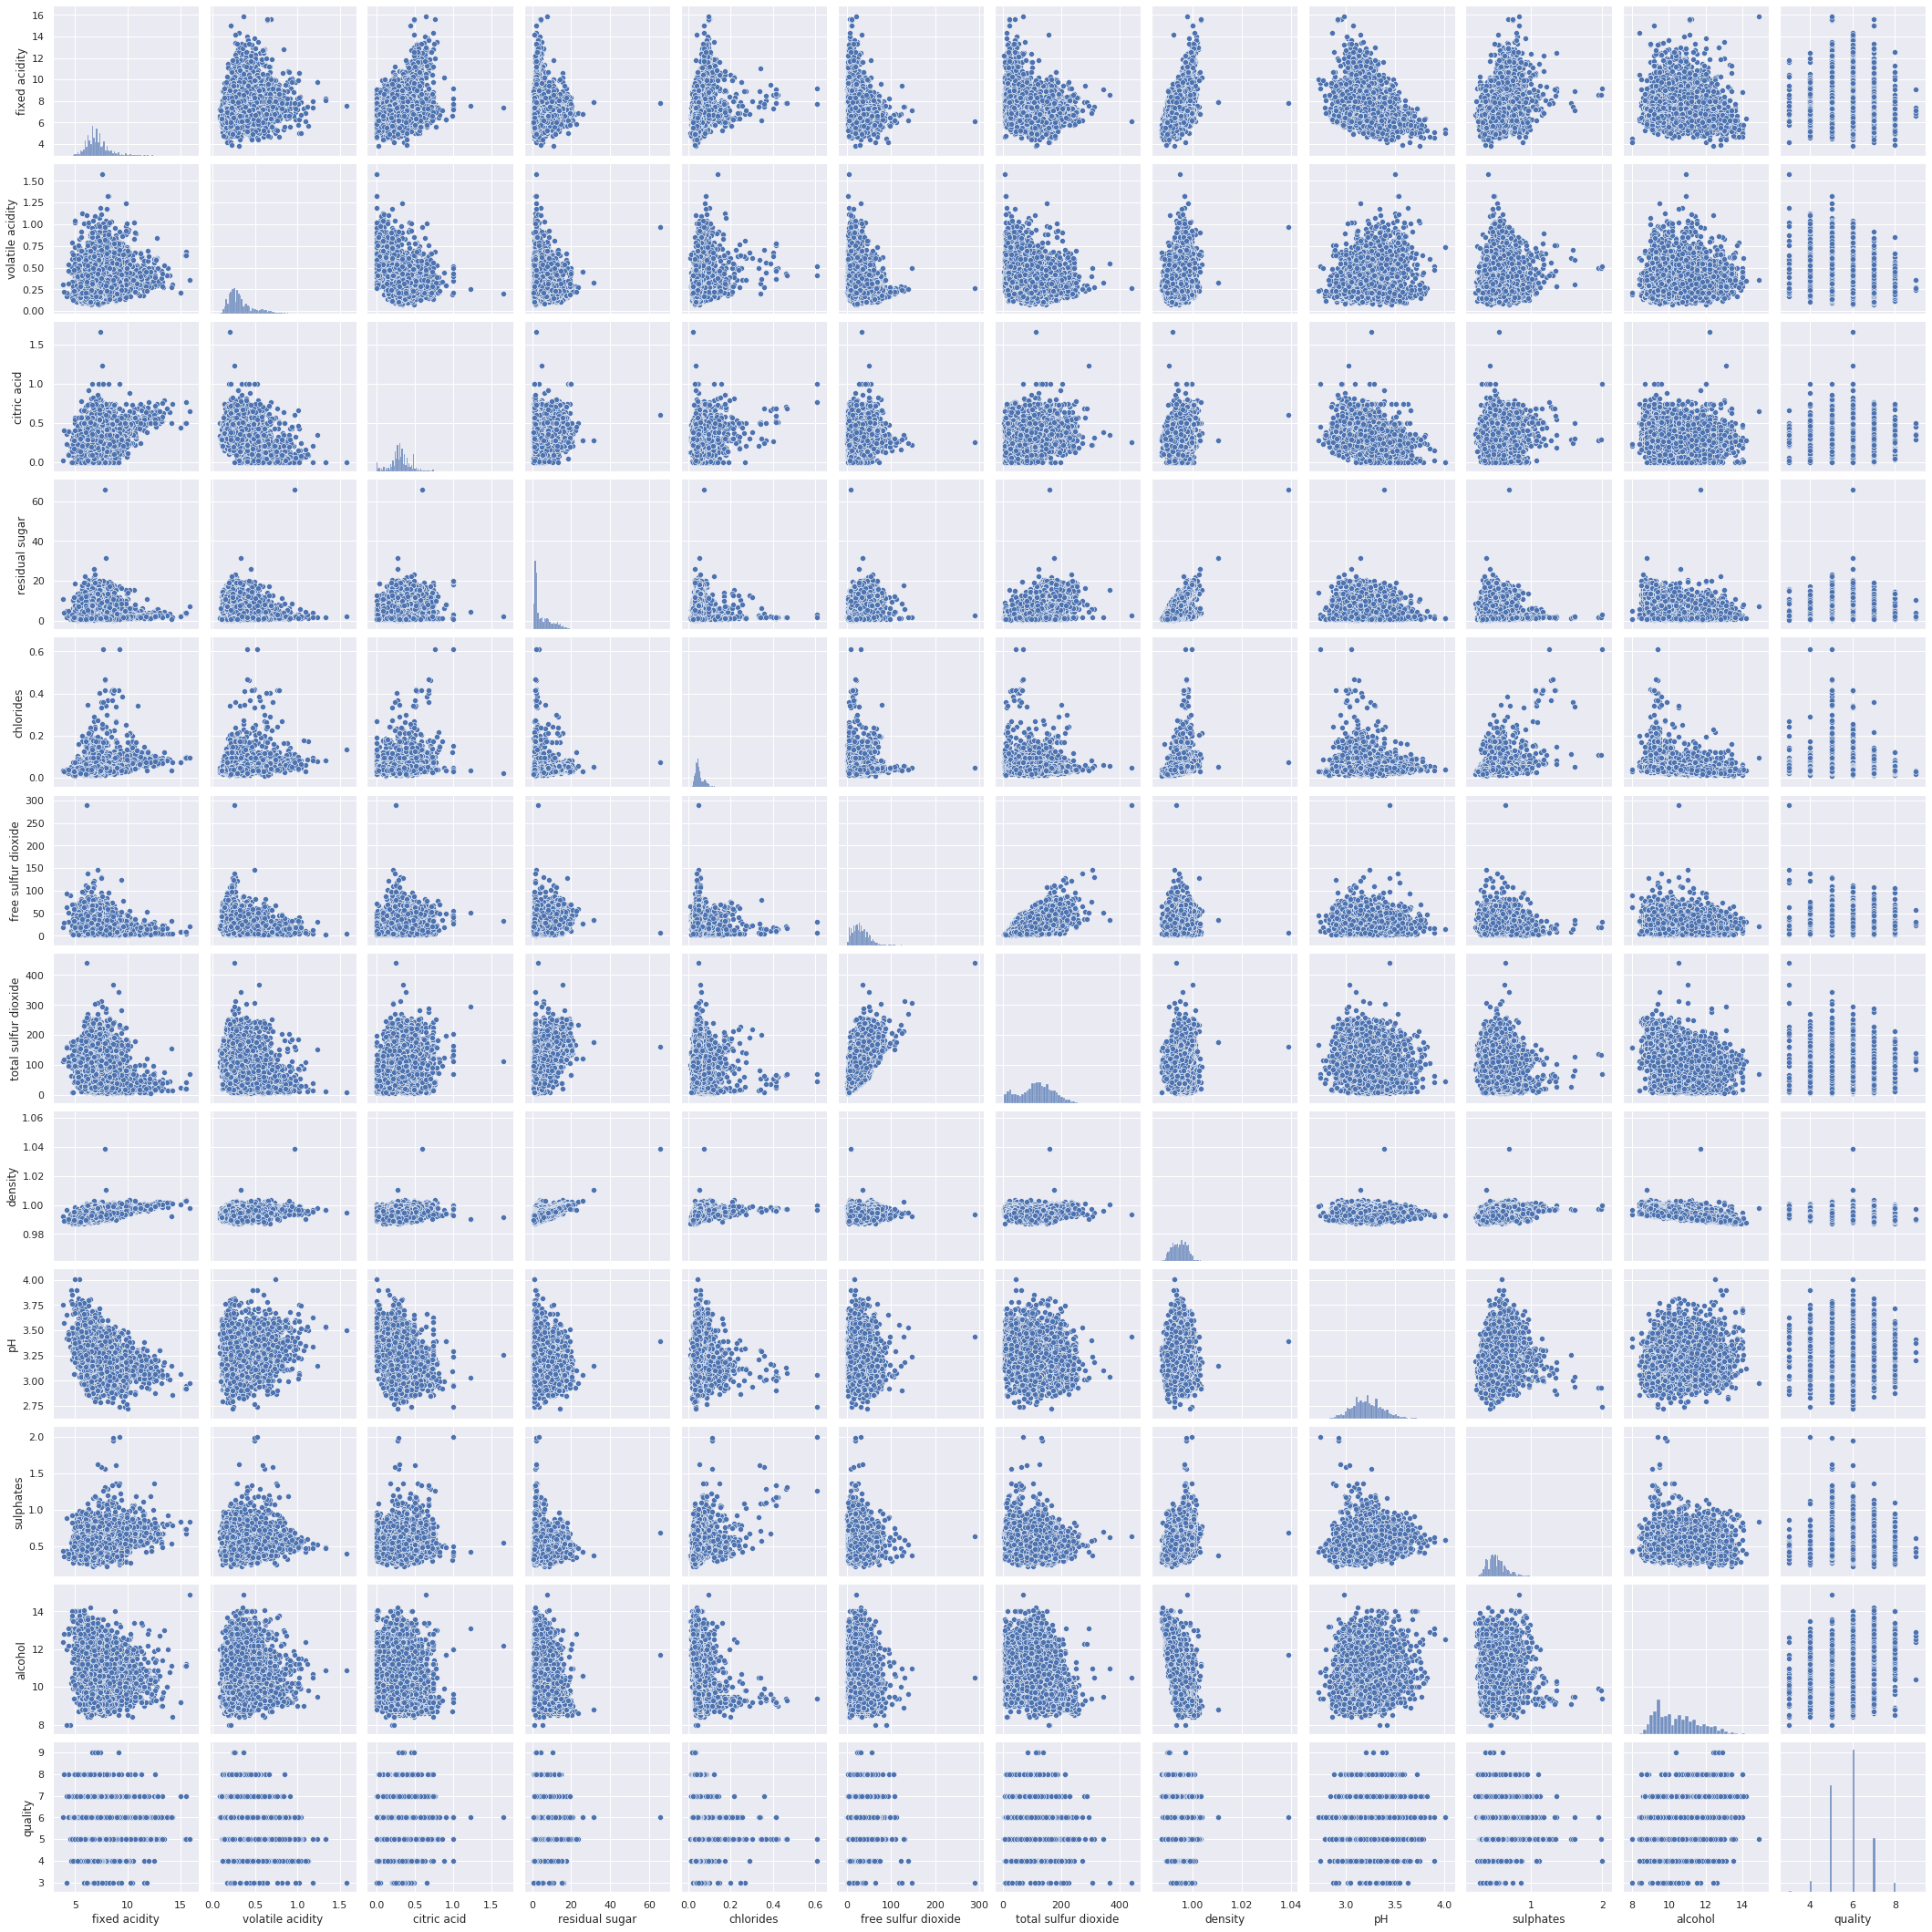

In [274]:
sns.pairplot(df)

In [275]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [276]:
sns.set(rc = {'figure.figsize':(11,6)})


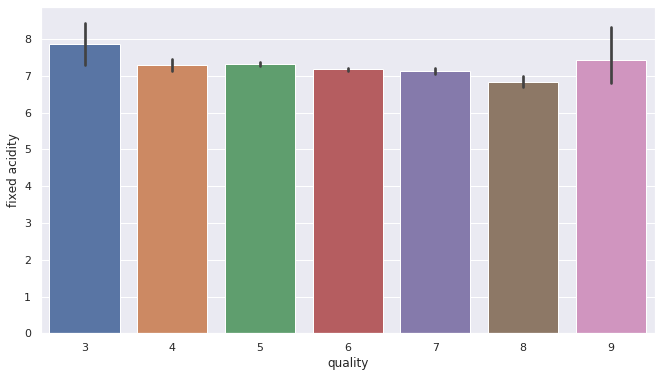

In [277]:
sns.barplot(data=df,x='quality',y='fixed acidity')

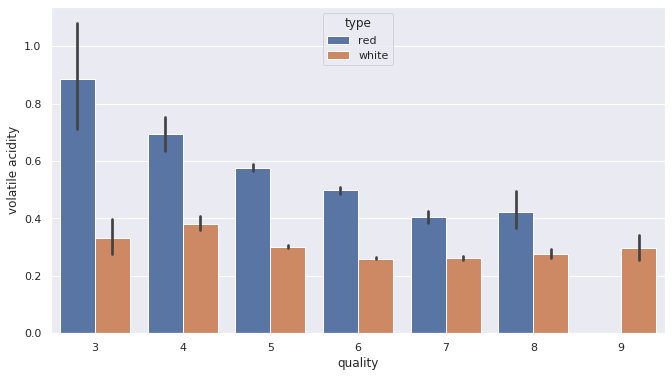

In [278]:
## We can see that the as volatile acidity decreases the quality of wine increases especially in for the red wine
sns.barplot(data=df,x='quality',y='volatile acidity',hue='type')

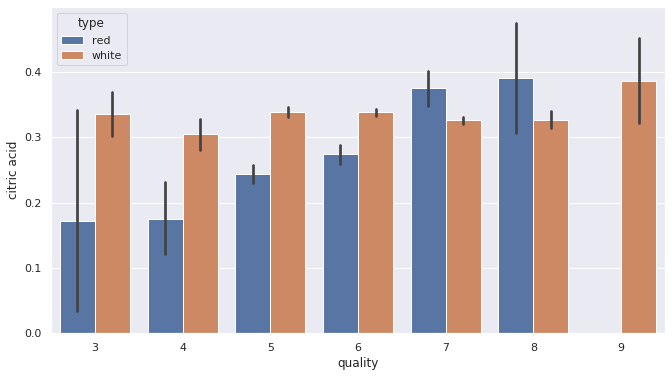

In [279]:
## As the citric content increases the quality of red wine increases 
sns.barplot(data=df,x='quality',y='citric acid',hue='type')

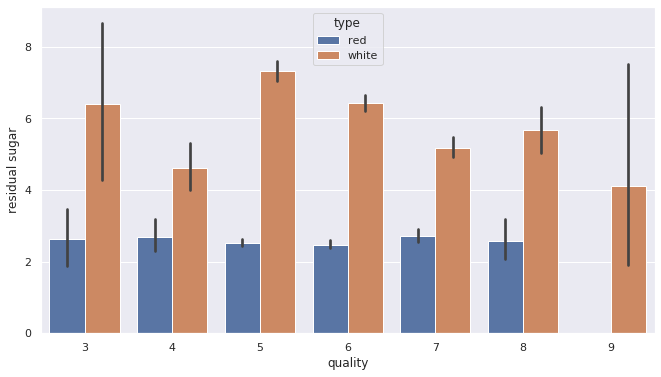

In [280]:
## We can clearly see that the 
sns.barplot(data=df,x='quality',y='residual sugar',hue='type')

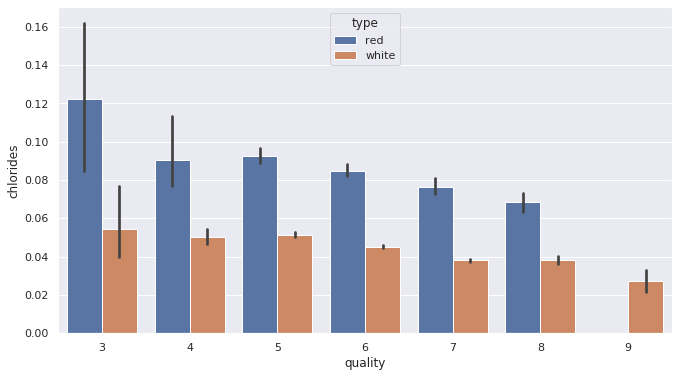

In [281]:
sns.barplot(data=df,x='quality',y='chlorides',hue='type')

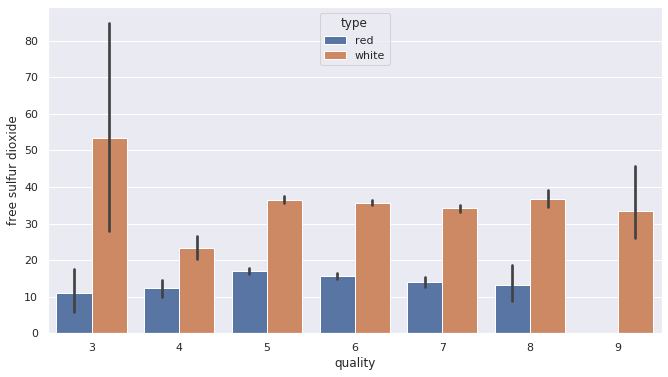

In [282]:
sns.barplot(data=df,x='quality',y='free sulfur dioxide',hue='type')

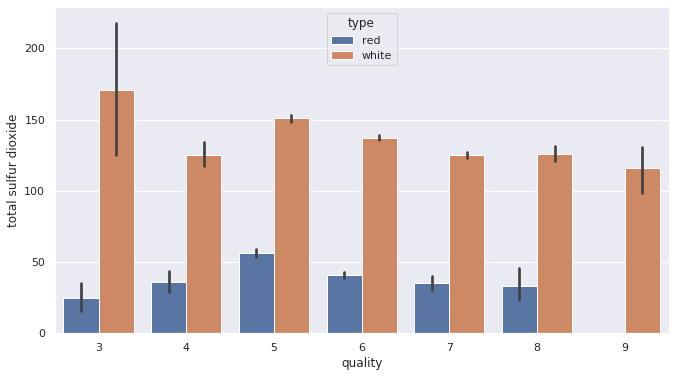

In [283]:
sns.barplot(data=df,x='quality',y='total sulfur dioxide',hue='type')

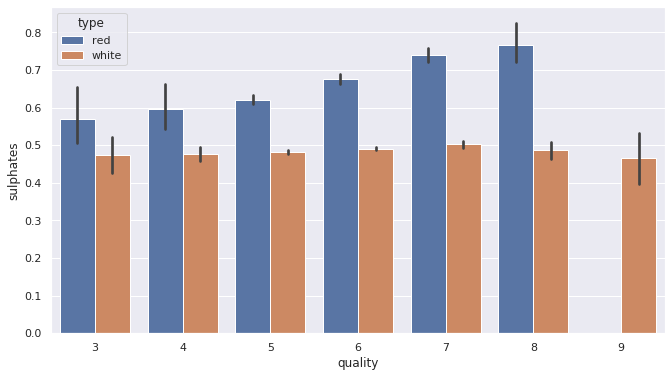

In [287]:
sns.barplot(data=df,x='quality',y='sulphates',hue='type')

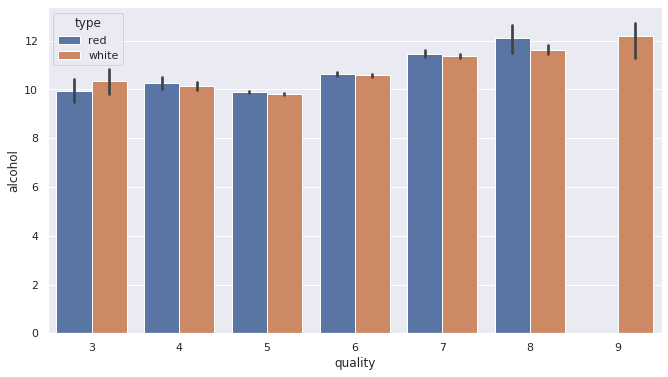

In [288]:
sns.barplot(data=df,x='quality',y='alcohol',hue='type')

### Answer : We can can clearly see that features that effect the red wine may or may not influence the white wine.

### Red Wine Analysis of features 

In [289]:
red_df.drop('index',axis= 1,inplace=True)
#red_df.columns()

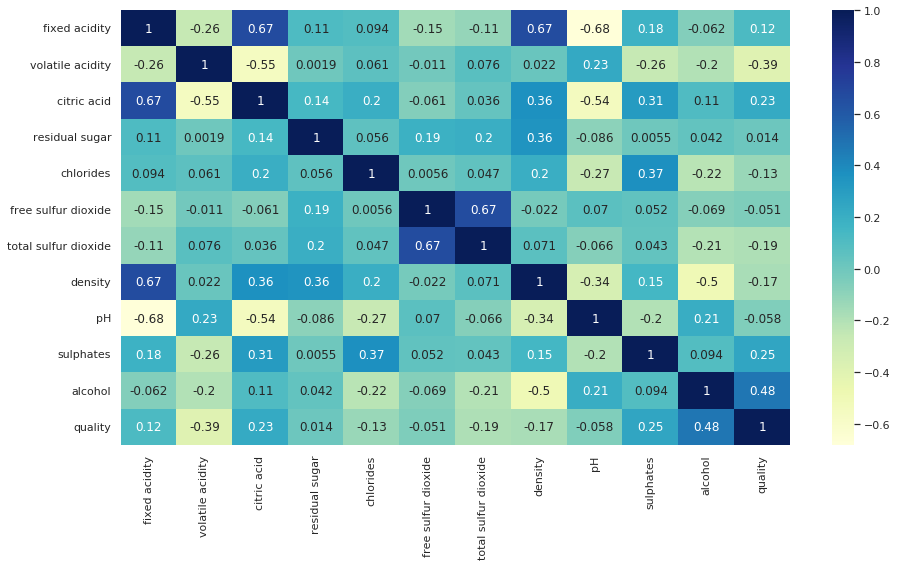

In [290]:

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(red_df.corr(), cmap="YlGnBu", annot=True)

#### Correlation of all the features in descending order

In [293]:
correlation = red_df.corr()
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [294]:
### Analysis of the highly correlated features in the dataset 

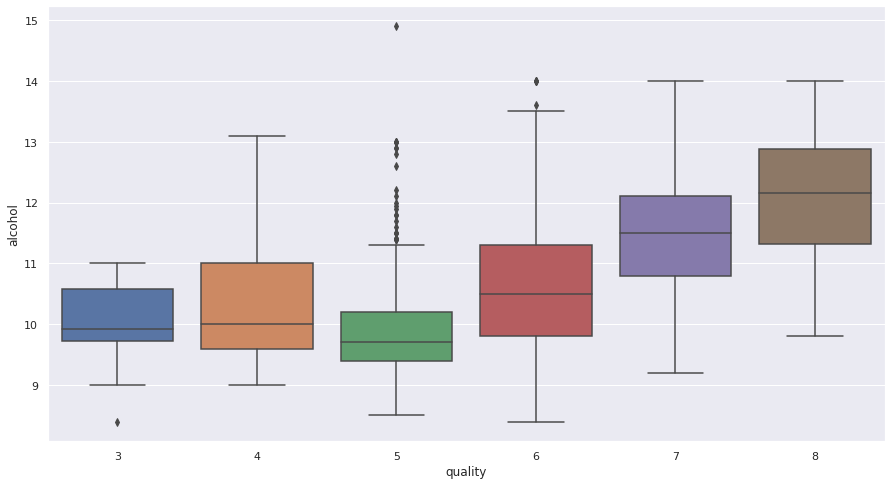

In [296]:
sns.boxplot(x="quality", y='alcohol', data = red_df)

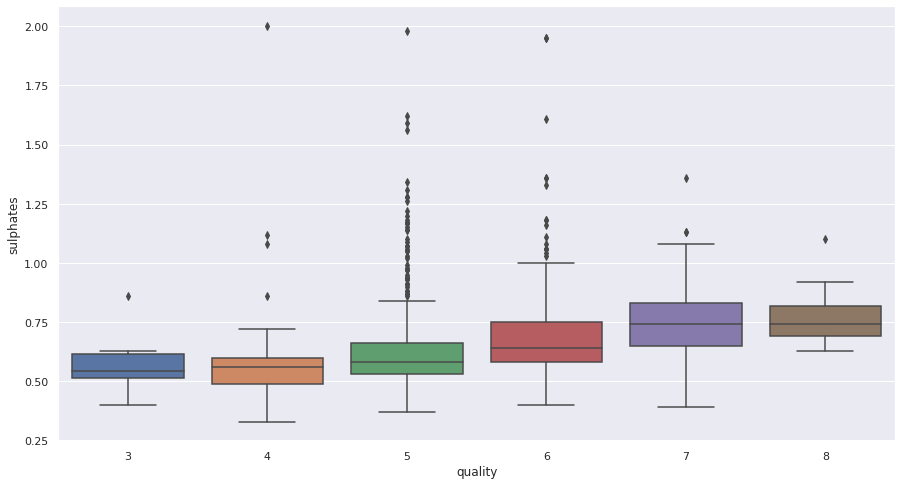

In [297]:
sns.boxplot(x="quality", y='sulphates', data = red_df)

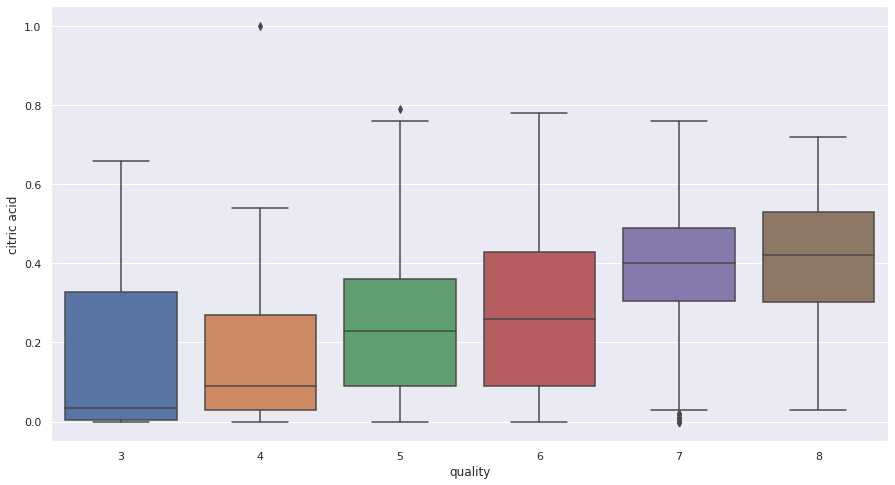

In [300]:
sns.boxplot(x="quality", y='citric acid', data = red_df)

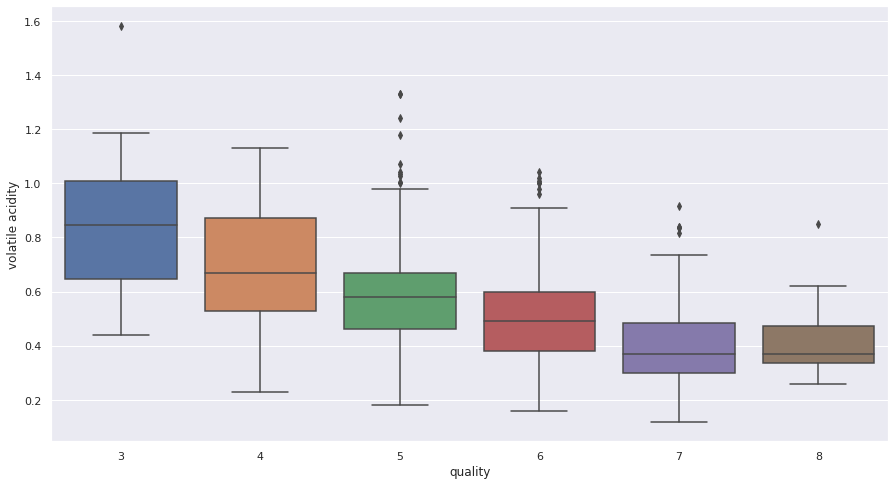

In [319]:
sns.boxplot(x="quality", y='volatile acidity', data = red_df)

In [301]:
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


#### Creating a new feature called rating based on the quality of the Wine

In [312]:
def cat(x):
    if x<=5:
        return 'bad'
    elif x>5 and x<=7:
        return 'average'
    else :
        return 'good'
    

In [313]:
red_df['quality_cat'] = red_df['quality'].apply(cat)

In [314]:
red_df['quality_cat'].nunique()

3

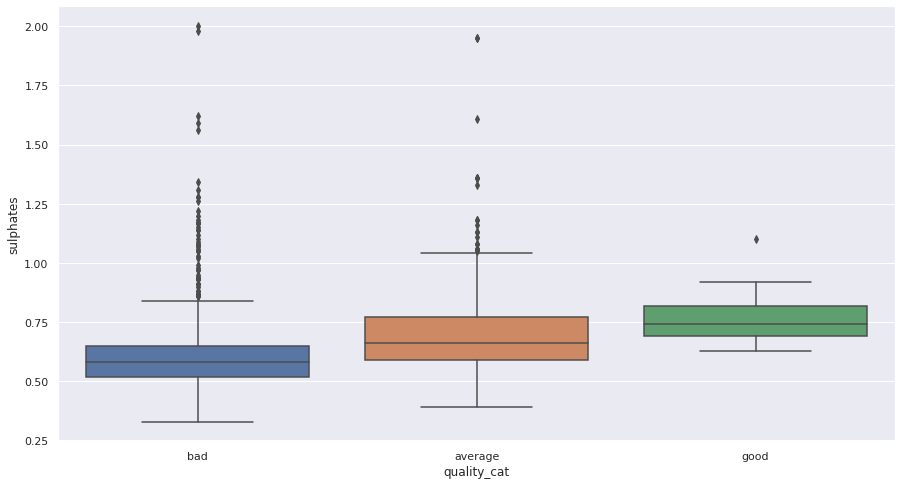

In [315]:
sns.boxplot(x="quality_cat", y='sulphates', data = red_df)

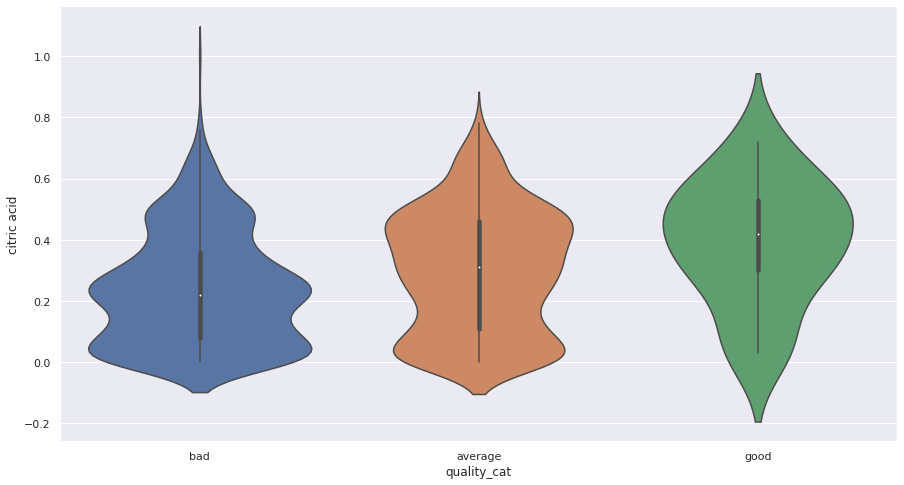

In [318]:
sns.violinplot(x = "quality_cat", y='citric acid', data = red_df)

# We can see that the median of citric acid increases as the quality of wine increases
# for quality range 3 to 5 i.e bad the probability of the presence of citric acid is around 0.25
# Similarly for average and good quality wines the probability of the presence 
# of citric acid is around 0.425 and 0.5 respectively.